In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import brentq
from scipy.integrate import odeint

### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

$$
    \frac{d^2 T}{d x^2} = - \alpha (T_{0} - T)
$$

In [2]:
alpha = 5 * 10**(-2)
T0 = 20

T_0 = 50
t_final = 10
T_final = 200
t = np.linspace(0, t_final, 100)

# y_init = [T_0, T_prime_0]
def rhs(y, t):
    return [y[1], -alpha * (T0-y[0])]

def plot_graph(y, t, T_final, t_final):
    plt.plot(t, y[:, 0])
    plt.plot(t_final, T_final, 'ro')
    plt.show()

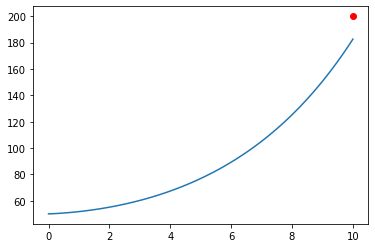

In [3]:
T_prime_0_guess_1 = 1
plot_graph(odeint(rhs, [T_0, T_prime_0_guess_1], t), t, T_final, t_final)

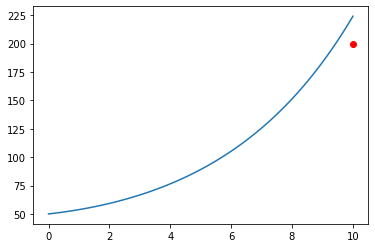

In [4]:
T_prime_0_guess_2 = 3
plot_graph(odeint(rhs, [T_0, T_prime_0_guess_2], t), t, T_final, t_final)

In [5]:
def obj_func(T_prime_0):
    sol = odeint(rhs, [T_0, T_prime_0], t)
    T_f = sol[-1, 0]
    return T_f - T_final

T' = 1.8396902901340682


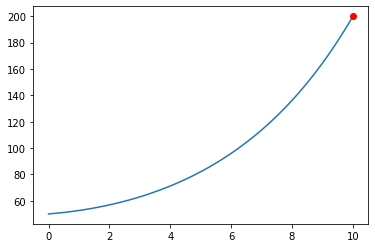

In [6]:
T_prime_0 = brentq(obj_func, T_prime_0_guess_1, T_prime_0_guess_2)
print(f"T' = {T_prime_0}")
plot_graph(odeint(rhs, [T_0, T_prime_0], t), t, T_final, t_final)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

$$
    \frac{d^2 T}{d x^2} = - \alpha (20 - T)
$$

$$
    T_{0} = 50
$$
$$
    T_{i-1} - 2T_{i} + T_{i+1} = - \alpha h^2 (20- T_{i}), \; i = 1, 2, ..., n-1
$$
$$
    T_{n} = 200
$$

$$
    T_{i-1} - 2T_{i} + T_{i+1} = - \alpha h^2 (20 - T_{i})
$$
$$
    T_{i-1} - 2T_{i} + T_{i+1} = - \alpha h^2 20 + \alpha h^2 T_{i}
$$
$$
    T_{i-1} - 2T_{i} + T_{i+1} - \alpha h^2 T_{i} = - \alpha h^2 20
$$
$$
    T_{i-1} - (2 + \alpha h^2)T_{i} + T_{i+1} = - \alpha h^2 20
$$

$$
    \begin{bmatrix}
        1 & & & & \\
        1 & - (2 + \alpha h^2) & 1 & &  \\
         & \ddots & \ddots & \ddots & \\
         & & 1 & - (2 + \alpha h^2) & 1 \\
         & & & & 1
    \end{bmatrix}
    \left[
        \begin{array}{c}
            T_{0} \\
            T_{1} \\
            ... \\
            T_{n-1} \\
            T_{n}
        \end{array}
    \right]
    =
    \left[
        \begin{array}{c}
            50 \\
            - \alpha h^2 20 \\
            ... \\
            - \alpha h^2 20 \\
            200
        \end{array}
    \right]
$$

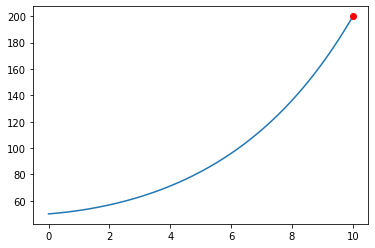

In [7]:
n = 1000
h = (t_final-0) / n

A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -(2 + alpha*h**2)
    A[i, i+1] = 1

b = np.zeros(n+1)
b[0] = 50
b[1: -1] = -alpha * h**2 * T0
b[-1] = 200

x = np.linalg.solve(A, b)

t = np.linspace(0, t_final, n+1)

plt.plot(t, x)
plt.plot(t_final, T_final, 'ro')
plt.show()